In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk


In [46]:
lifeExpectancyPrediction_Train=pd.read_csv('train.csv')
lifeExpectancyPrediction_Test=pd.read_csv('test.csv')


In [47]:
lifeExpectancyPrediction_Train

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207
5,6,58.9,146,2012,0,279,266,292,74,0.01,...,66,9.20,66.0,0.1,619.73,2883167,18.4,18.4,0.448,3.033150
6,7,57.5,146,2011,0,281,270,292,77,0.01,...,63,9.42,63.0,0.1,499.40,284331,18.6,18.7,0.434,2.983287
7,8,57.0,146,2010,0,287,276,298,80,0.03,...,64,8.33,64.0,0.1,418.16,2729431,18.8,18.9,0.433,2.949576
8,9,63.0,146,2009,0,295,276,314,82,0.02,...,63,6.73,63.0,0.1,414.22,26616792,19.0,19.1,0.415,2.898275
9,10,54.1,146,2008,0,295,304,286,84,0.03,...,58,7.43,58.0,0.1,305.27,2589345,19.2,19.3,0.405,2.846050


In [48]:
X = lifeExpectancyPrediction_Train.drop(['ID','TARGET_LifeExpectancy'], axis=1)
Y =  lifeExpectancyPrediction_Train[['TARGET_LifeExpectancy']]



X_Train_Poly = lifeExpectancyPrediction_Train.drop(['TARGET_LifeExpectancy', 'ID'], axis=1)
Y_Train_Poly = lifeExpectancyPrediction_Train[['TARGET_LifeExpectancy']]
X_Test_Poly = lifeExpectancyPrediction_Test.drop('ID', axis=1)


In [49]:
from sklearn import linear_model
linReg = linear_model.LinearRegression(normalize=False)


<span style="color:blue; font-weight:bold">If i do degree=4 all the majority prediction comes to be nearly 68,which is not diverse, but given the degree 3, prediction coming from 50 to 80, which is pretty much diverse</span>

In [50]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2, include_bias=True)
polyTrainX = polyFeat.fit_transform(X_Train_Poly)
polyTestX = polyFeat.fit_transform(X_Test_Poly)
linReg.fit(polyTrainX, Y_Train_Poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
print(linReg.intercept_)
print(linReg.coef_)

[-16.43995987]
[[ 8.91622849e-04 -3.28744510e-05  9.21599197e-07  1.25444685e-06
   6.54796840e-05  6.56667634e-05  6.55016699e-05 -8.53737614e-05
  -2.48227005e-06 -2.64392276e-04  5.81568020e-04 -6.42041403e-06
  -1.05674326e-04 -2.36540788e-05  1.00823978e-06 -2.35795009e-06
   1.05019360e-06 -1.77391657e-03 -2.72579600e-06 -6.99985306e-07
  -7.47509860e-07  1.77718368e-06  6.94873984e-07 -2.77817651e-05
   6.28377944e-06 -1.90372258e-03  2.84049036e-06 -1.21403255e-05
   1.78213092e-05 -6.38263604e-04 -1.43430644e-04  1.10406778e-06
   2.28441020e-06 -3.52662702e-04  3.74354379e-04  7.05225899e-04
   1.05859285e-03 -2.11690452e-04 -1.65780510e-03  6.90591616e-08
  -1.72896686e-11 -3.96878192e-04 -2.53075670e-04 -3.58414745e-03
  -1.05444331e-02  1.65365969e-05  1.52986335e-03  5.62886988e-06
  -7.76511619e-05  8.89089014e-05  2.72985266e-05  1.13579231e-04
   4.61118591e-07 -8.10252011e-07  4.03814692e-05  1.89690848e-05
  -1.22342199e-04 -2.73158728e-04  1.15830524e-04 -6.77874453

In [52]:
predYRm_Poly = linReg.predict(polyTestX)
predictedResults=pd.DataFrame(predYRm_Poly, columns=['Predicted Life Expectancy_Polynomial']).to_csv('polynomial_prediction.csv')


## K-FOLD CROSS VALIDATION

In [53]:
from sklearn import model_selection
number_splits = 10
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

In [64]:
lRegPara_ridge = [0, 0.01, 0.1, 0.5, 0.8, 1]

Text(0, 0.5, 'Average MSE')

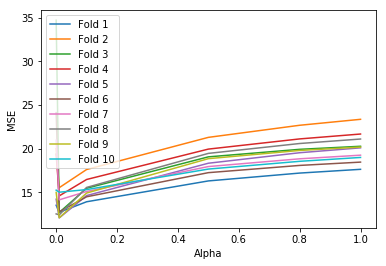

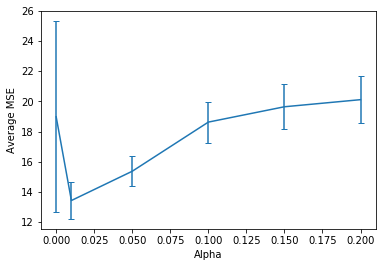

In [65]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X_Train_Poly):
# Get the training and validation data
    trainX_Regularization = np.array(X_Train_Poly.loc[trainIndex])
    trainY_Regularization = np.array(Y_Train_Poly.loc[trainIndex])
    validX_Regularization = np.array(X_Train_Poly.loc[validIndex])
    validY_Regularization = np.array(Y_Train_Poly.loc[validIndex])
    
    
# This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX_Regularization)
    polyFitValidX = polyFeat.fit_transform(validX_Regularization)
    for j , regPara in enumerate(lRegPara_ridge):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY_Regularization)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY_Regularization, predY)
        lResults[nsplit, j] = (mse)        
        
    plt.plot(lRegPara_ridge, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/ec2-user/anaconda3/envs/python3/lib/

Text(0, 0.5, 'Average MSE')

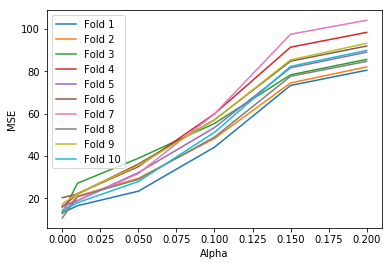

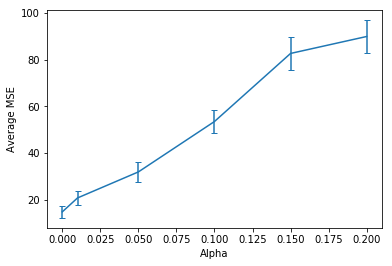

In [56]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# print('R2 ', r2_score(testY, predYRm))
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X_Train_Poly):
# Get the training and validation data
    trainX_Regularization = np.array(X_Train_Poly.loc[trainIndex])
    trainY_Regularization = np.array(Y_Train_Poly.loc[trainIndex])
    validX_Regularization = np.array(X_Train_Poly.loc[validIndex])
    validY_Regularization = np.array(Y_Train_Poly.loc[validIndex])
    
    
# This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX_Regularization)
    polyFitValidX = polyFeat.fit_transform(validX_Regularization)
    for j , regPara in enumerate(lRegPara):
        lasso=linear_model.Lasso(alpha=regPara, normalize=True)
        polyRidgeReg = lasso
        polyRidgeReg.fit(polyFitTrainX, trainY_Regularization)
#         train_score=lasso.score(trainX_Regularization,trainY_Regularization)

        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY_Regularization, predY)
        lResults[nsplit, j] = (mse) 
        
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

## Investigating the model

MSE :  33.73175220247313


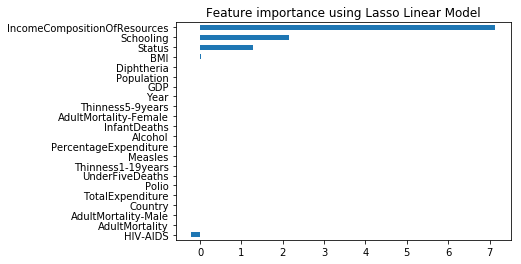

In [57]:
from sklearn.metrics import mean_squared_error
trainX, validX, trainY, validY = model_selection.train_test_split(X_Train_Poly, Y_Train_Poly, test_size=0.20)
LassoReg = linear_model.Lasso(alpha=0.05, normalize=True)
LassoReg.fit(trainX, trainY)
predY = LassoReg.predict(validX)
mse = mean_squared_error(validY, predY)
print("MSE : ", mse)
coef = pd.Series(np.squeeze(LassoReg.coef_), index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Linear Model")
plt.show()